# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [23]:
import pandas as pd
import texthero as hero
import matplotlib.pyplot as plt
import seaborn as sns
from texthero import preprocessing
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [24]:
# Read the XLSX file
data= pd.read_csv("../data/Emotion_final.csv")

## <font color="green"> || - Data Visualisation :</font>

In [25]:
data

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [27]:
data["Emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [28]:
data.isna().sum()

Text       0
Emotion    0
dtype: int64

In [29]:
# Répartition des textes par émotions
emotion_counts = data['Emotion'].value_counts()
emotion_counts

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

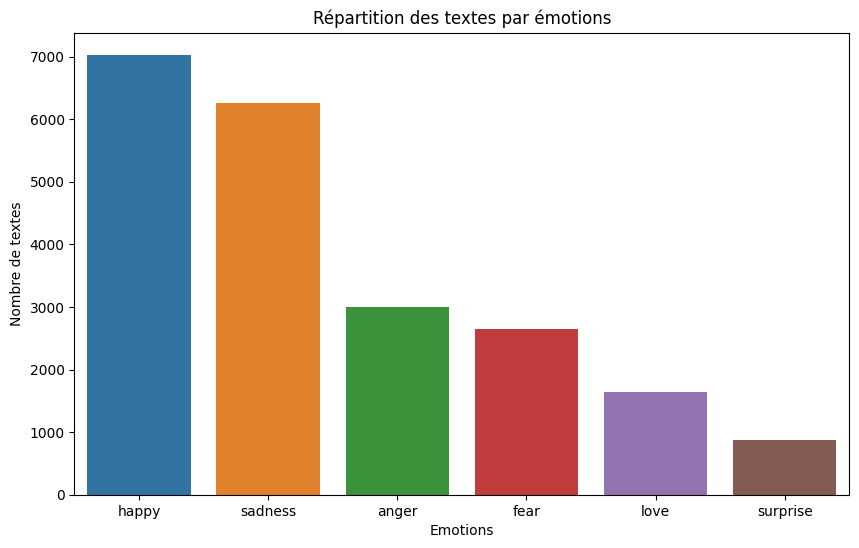

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xlabel('Emotions')
plt.ylabel('Nombre de textes')
plt.title('Répartition des textes par émotions')
plt.show()

## <font color="green"> ||| - Data Preprocessing</font>

In [31]:
# Prétraitement des données
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_urls,
                   preprocessing.remove_digits,
                   preprocessing.remove_brackets,
                   preprocessing.remove_angle_brackets,
                   preprocessing.remove_curly_brackets,
                   preprocessing.remove_square_brackets,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_round_brackets,
                   preprocessing.remove_html_tags,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_stopwords]



data['clean_text'] = hero.clean(data['Text'], pipeline=custom_pipeline)


In [32]:
data

,Text,Emotion,clean_text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful ar...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know ...
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,melissa stared friend dism
21455,Successive state elections have seen the gover...,fear,successive state elections seen governing pa...
21456,Vincent was irritated but not dismay,fear,vincent irritated dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,kendall hume turned back face dismayed coup


In [33]:
# Extraction des mots les plus courants pour chaque sentiment
top_words_by_emotion = {}
for emotion in data['Emotion'].unique():
    mask = data['Emotion'] == emotion
    text = data[mask]['clean_text']
    words = ' '.join(text).split()
    word_freq = FreqDist(words)
    top_words = [word for word, freq in word_freq.most_common(30) if word not in stopwords.words('english')]
    top_words_by_emotion[emotion] = top_words

In [34]:
# Affichage des 30 mots les plus courants pour chaque sentiment
for emotion, words in top_words_by_emotion.items():
    print(f"Emotion: {emotion}")
    print(words)
    print()

Emotion: sadness
['feel', 'feeling', 'like', 'im', 'really', 'know', 'get', 'would', 'time', 'little', 'ive', 'still', 'even', 'want', 'one', 'life', 'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could', 'pretty']

Emotion: anger
['feel', 'feeling', 'like', 'im', 'really', 'get', 'people', 'know', 'time', 'little', 'want', 'even', 'would', 'angry', 'think', 'one', 'could', 'things', 'bit', 'way', 'offended', 'dont', 'resentful', 'cold', 'still', 'something', 'irritable', 'cant', 'going', 'bothered']

Emotion: love
['feel', 'feeling', 'like', 'im', 'love', 'really', 'know', 'sweet', 'loving', 'time', 'want', 'people', 'caring', 'passionate', 'one', 'sympathetic', 'life', 'liked', 'get', 'hot', 'little', 'feelings', 'tender', 'lovely', 'longing', 'loved', 'would', 'need', 'accepted', 'nostalgic']

Emotion: surprise
['feel', 'feeling', 'like', 'im', 'amazed', 'impressed', 'curious', 'overwhelmed', 'funny', 'surprised', 'weird', 's

In [35]:

nltk.download('wordnet')

# stopwords_list = ['feeling','feel','people','im','going', 'one', 'something', 'get','ive','back','day','know','time','way','thing','even','cant']
stopwords_list = ['feel','feeling','feelings','like','im','know','get','would','time','little','even','one','life','people','think','bit','things','much','dont','make','going']

# Initialiser le lemmatiseur WordNet
lemmatizer = WordNetLemmatizer()

# Supprimer les mots qui se ressemblent et garder la racine
for emotion, words in top_words_by_emotion.items():
    print(f"Emotion: {emotion}")
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list]
    unique_words = set(lemmatized_words)
    print(unique_words)
    print()


Emotion: sadness
{'pretty', 'something', 'still', 'could', 'ive', 'back', 'way', 'want', 'day', 'really'}

Emotion: anger
{'cant', 'something', 'still', 'offended', 'could', 'bothered', 'way', 'angry', 'resentful', 'want', 'irritable', 'cold', 'really'}

Emotion: love
{'liked', 'passionate', 'hot', 'loving', 'need', 'tender', 'love', 'sweet', 'loved', 'nostalgic', 'sympathetic', 'lovely', 'want', 'accepted', 'longing', 'really', 'caring'}

Emotion: surprise
{'weird', 'curious', 'strange', 'really', 'dazed', 'still', 'feel', 'funny', 'could', 'impressed', 'surprised', 'stunned', 'amazing', 'amazed', 'overwhelmed', 'shocked'}

Emotion: fear
{'weird', 'agitated', 'strange', 'go', 'still', 'ive', 'nervous', 'anxious', 'want', 'terrified', 'frightened', 'scared', 'afraid', 'really'}

Emotion: happy
{'pretty', 'well', 'something', 'still', 'love', 'ive', 'could', 'happy', 'want', 'good', 'really', 'day'}



[nltk_data] Downloading package wordnet to
[nltk_data]     /home/apprenant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## <font color="green"> IV - Métrique de proximité entre les sentiments </font>

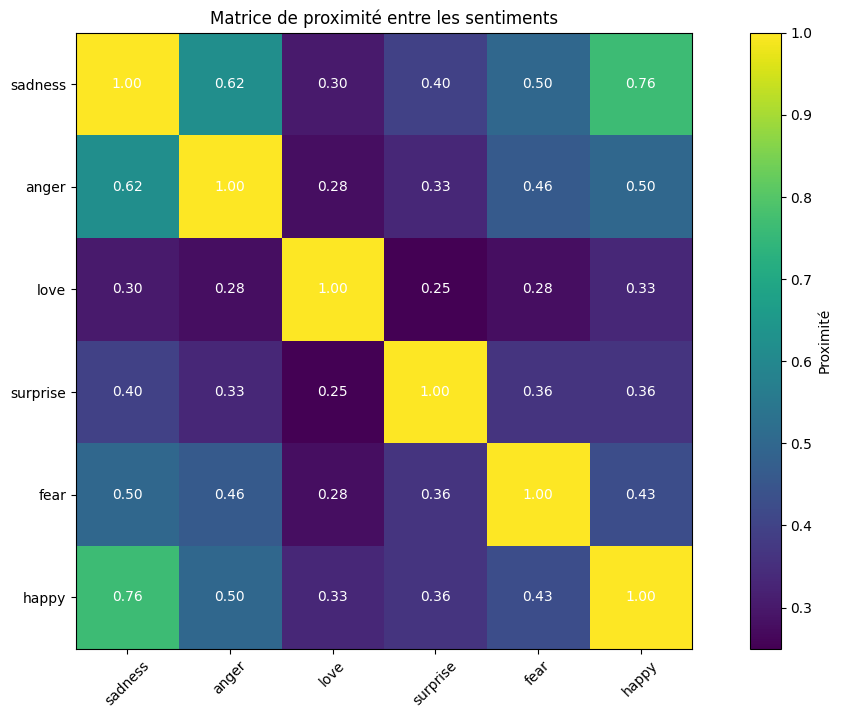

In [36]:

# Créer une matrice vide pour stocker la proximité entre les sentiments
proximity_matrix = np.zeros((len(top_words_by_emotion), len(top_words_by_emotion)))

# Calculer la proximité entre les sentiments
for i, (emotion1, top_words1) in enumerate(top_words_by_emotion.items()):
    for j, (emotion2, top_words2) in enumerate(top_words_by_emotion.items()):
        # Calculer le nombre de mots en commun entre les deux sentiments
        common_words = set(top_words1) & set(top_words2)
        
        # Stocker la proximité normalisée entre les sentiments dans la matrice
        proximity_matrix[i, j] = len(common_words) / len(set(top_words1) | set(top_words2))
        # Remark : En divisant le nombre de mots en commun par le nombre total de mots distincts, nous obtenons une valeur de proximité normalisée entre 0 et 1. 
        # Plus cette valeur est proche de 1, plus les sentiments sont similaires en termes de mots les plus courants.


# Afficher la matrice de proximité sous forme de heatmap avec annotations
plt.figure(figsize=(15, 8))
plt.imshow(proximity_matrix, cmap='viridis')

# Ajouter les annotations des valeurs sur chaque carré de la matrice
for i in range(len(top_words_by_emotion)):
    for j in range(len(top_words_by_emotion)):
        plt.text(j, i, f'{proximity_matrix[i, j]:.2f}', ha='center', va='center', color='white')

plt.xticks(np.arange(len(top_words_by_emotion)), top_words_by_emotion.keys(), rotation=45)
plt.yticks(np.arange(len(top_words_by_emotion)), top_words_by_emotion.keys())
plt.colorbar(label='Proximité')
plt.title('Matrice de proximité entre les sentiments')
plt.show()


## <font color="green"> V - First Machine Learning Model : </font>

In [37]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['Emotion'], test_size=0.2, random_state=42)

# Créer le modèle Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Entraîner et évaluer le modèle BoW avec une régression logistique
bow_model = LogisticRegression()
bow_model.fit(X_train_bow, y_train)
bow_predictions = bow_model.predict(X_test_bow)

print("Rapport de classification pour le modèle BoW :")
print(classification_report(y_test, bow_predictions))
print()

# Créer le modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraîner et évaluer le modèle TF-IDF avec une régression logistique
tfidf_model = LogisticRegression()
tfidf_model.fit(X_train_tfidf, y_train)
tfidf_predictions = tfidf_model.predict(X_test_tfidf)

# Mesure de confiance (ici, probabilité de la classe prédite)
confidence = tfidf_model.predict_proba(X_test_tfidf).max(axis=1)

print("Rapport de classification pour le modèle TF-IDF :")
print(classification_report(y_test, tfidf_predictions))
confidence

/home/apprenant/miniconda3/envs/nlp_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Rapport de classification pour le modèle BoW :
              precision    recall  f1-score   support

       anger       0.91      0.86      0.88       617
        fear       0.87      0.85      0.86       531
       happy       0.91      0.94      0.92      1381
        love       0.82      0.78      0.80       318
     sadness       0.92      0.94      0.93      1277
    surprise       0.78      0.72      0.75       168

    accuracy                           0.89      4292
   macro avg       0.87      0.85      0.86      4292
weighted avg       0.89      0.89      0.89      4292


Rapport de classification pour le modèle TF-IDF :
              precision    recall  f1-score   support

       anger       0.92      0.80      0.86       617
        fear       0.87      0.79      0.83       531
       happy       0.85      0.96      0.90      1381
        love       0.90      0.66      0.76       318
     sadness       0.89      0.95      0.92      1277
    surprise       0.86      0.55 

/home/apprenant/miniconda3/envs/nlp_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.52319968, 0.7260893 , 0.44777493, ..., 0.55358467, 0.63374313,
       0.71624663])

In [38]:
tfidf_predictions

array(['happy', 'anger', 'sadness', ..., 'anger', 'anger', 'happy'],
      dtype=object)

In [39]:
data['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from elasticsearch import Elasticsearch
from faker import Faker


# Connexion à Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Alimentation de l'index "notes" avec les données factices et les prédictions
fake = Faker()
for i, emotion, conf in zip(range(len(X_test)), tfidf_predictions, confidence):
    document = {
        "patient_lastname": fake.last_name(),
        "patient_firstname": fake.first_name(),
        "text": data['Text'][i],
        "date": fake.date_this_decade(),
        "patient_left": fake.boolean(),
        "emotion": tfidf_predictions[i],
        "confidence": confidence[i]
    }
    es.index(index="notes2", body=document)

# Vérification des résultats
search_query = {
    "query": {
        "match": {
            "emotion": "happy"  # Émotion à rechercher
        }
    }
}

search_results = es.search(index="notes2", body=search_query)
for hit in search_results["hits"]["hits"]:
    print(f"Emotion: {hit['_source']['emotion']}, Confidence: {hit['_source']['confidence']}")


/tmp/ipykernel_54681/1087872115.py:44: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  es.index(index="notes2", body=document)
/tmp/ipykernel_54681/1087872115.py:44: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.index(index="notes2", body=document)


Emotion: happy, Confidence: 86.1130164613018
Emotion: happy, Confidence: 0.5231996847165503
Emotion: happy, Confidence: 0.40182865877104257
Emotion: happy, Confidence: 0.7655663911347499
Emotion: happy, Confidence: 0.8459004268701387
Emotion: happy, Confidence: 0.2605887059263876
Emotion: happy, Confidence: 0.628869479265879
Emotion: happy, Confidence: 0.38405614990812686
Emotion: happy, Confidence: 0.6658740506816098
Emotion: happy, Confidence: 0.6187301126987258


/tmp/ipykernel_54681/1087872115.py:55: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes", body=search_query)
/tmp/ipykernel_54681/1087872115.py:55: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes", body=search_query)


In [46]:
# Vérification des résultats
search_query = {
    "query": {
        "match": {
            "emotion": "anger"  # Émotion à rechercher
        }
    }
}

search_results = es.search(index="notes2", body=search_query)
for hit in search_results["hits"]["hits"]:
    print(f"Emotion: {hit['_source']['emotion']}, Confidence: {hit['_source']['confidence']}")


/tmp/ipykernel_54681/35963937.py:10: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)


Emotion: anger, Confidence: 0.7260893017467942
Emotion: anger, Confidence: 0.6494661737200706
Emotion: anger, Confidence: 0.2971605954865059
Emotion: anger, Confidence: 0.43314433347176295
Emotion: anger, Confidence: 0.7260059944532392
Emotion: anger, Confidence: 0.8842673167022596
Emotion: anger, Confidence: 0.7763694867826741
Emotion: anger, Confidence: 0.5502009007821632
Emotion: anger, Confidence: 0.37805145457176514
Emotion: anger, Confidence: 0.5995251239224669


/tmp/ipykernel_54681/35963937.py:10: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


In [47]:
# Rechercher tous les documents dans l'index "notes"
response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch. 
# La réponse contient les documents correspondants. Les documents sont extraits en accédant à response['hits']['hits'].


# Récupérer les documents à partir de la réponse
documents = response['hits']['hits']

# Parcourir les documents et afficher leurs données
for doc in documents:
    print("ID du document :", doc['_id'])     # L'ID du document est accessible via doc['_id'].
    print("Données du document :", doc['_source'])      # Les données du document sont accessibles via doc['_source'].
    print("--------------------")


ID du document : 0EvrIIkB8LqwVNGagQg6
Données du document : {'patient_lastname': 'Davies', 'patient_firstname': 'Charles', 'text': 'i didnt feel humiliated', 'date': '2021-03-29', 'patient_left': False, 'emotion': 'happy', 'confidence': 0.5231996847165503}
--------------------
ID du document : 0UvrIIkB8LqwVNGagQhX
Données du document : {'patient_lastname': 'Rocha', 'patient_firstname': 'Kenneth', 'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'date': '2022-03-09', 'patient_left': True, 'emotion': 'anger', 'confidence': 0.7260893017467942}
--------------------
ID du document : 0kvrIIkB8LqwVNGagQht
Données du document : {'patient_lastname': 'Garrison', 'patient_firstname': 'Katrina', 'text': 'im grabbing a minute to post i feel greedy wrong', 'date': '2022-09-15', 'patient_left': False, 'emotion': 'sadness', 'confidence': 0.4477749266394086}
--------------------
ID du document : 00vrIIkB8LqwVNGagQiF
Données du docum

/tmp/ipykernel_54681/2109587630.py:2: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch.
/tmp/ipykernel_54681/2109587630.py:2: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch.


In [51]:
from elasticsearch import Elasticsearch
import pandas as pd

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Patient spécifique
patient_lastname = "Davies"
patient_firstname = "Charles"

# Requête Elasticsearch pour récupérer les documents du patient spécifique
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents correspondants
documents = response['hits']['hits']

# Liste pour stocker les sentiments
sentiments = []

# Parcourir les documents et extraire les sentiments
for doc in documents:
    sentiment = doc['_source']['emotion']
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Effectuer l'agrégation et le comptage des sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Afficher la répartition des sentiments
print(sentiment_counts)

Sentiment
happy    1
Name: count, dtype: int64


/tmp/ipykernel_54681/230937345.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_54681/230937345.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


In [52]:
df

,Sentiment
0,happy


In [53]:
from elasticsearch import Elasticsearch
import pandas as pd

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Patient spécifique
patient_lastname = "Christensen"
patient_firstname = "Anthony"

# Requête Elasticsearch pour récupérer les documents du patient spécifique
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents correspondants
documents = response['hits']['hits']

# Liste pour stocker les sentiments
sentiments = []

# Parcourir les documents et extraire les sentiments
for doc in documents:
    sentiment = doc['_source']['emotion']
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Effectuer l'agrégation et le comptage des sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Afficher la répartition des sentiments
print(sentiment_counts)

Sentiment
sadness    1
Name: count, dtype: int64


/tmp/ipykernel_54681/3010663931.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_54681/3010663931.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


In [61]:
from elasticsearch import Elasticsearch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Requête Elasticsearch pour récupérer tous les documents
query = {"query": {"match_all": {}}}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents
documents = response['hits']['hits']

# Dictionnaire pour stocker les comptages de sentiments contradictoires
contradictory_counts = {}

# Parcourir les documents et compter les sentiments contradictoires
for doc in documents:
    sentiment = doc['_source']['emotion']
    text = doc['_source']['text']
    
    for contradictory_sentiment in contradictory_counts.keys():
        if contradictory_sentiment in text:
            contradictory_counts[sentiment][contradictory_sentiment] += 1

# Calculer les pourcentages de sentiments contradictoires
total_documents = len(documents)
contradictory_percentages = {}

for sentiment in contradictory_counts.keys():
    contradictory_percentages[sentiment] = {}
    for contradictory_sentiment, count in contradictory_counts[sentiment].items():
        percentage = count / total_documents * 100
        contradictory_percentages[sentiment][contradictory_sentiment] = percentage

# Créer un DataFrame à partir de la matrice de pourcentages
data = pd.DataFrame(contradictory_percentages)

/tmp/ipykernel_54681/1840867261.py:13: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_54681/1840867261.py:13: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


In [62]:
data

""
